# Exploratory Analysis of Prosper Loan Data
## by Paul Zebarth

## Preliminary Wrangling

> We are using the prosper loan dataset contained in the file 'prosperLoanData.csv'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.shape

(113937, 81)

### Structure of the dataset

> The dataset consists of 81 columns and 113937 entries. It contains the data types: object, int64, float64, and bool. 

### Main feature of interest

> I want to explore how borrower rate is affected by the other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the borrower rate will depend on: 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating', 'LoanCurrentDaysDelinquent', 'IsBorrowerHomeOwner', 'DebtToIncomeRatio', 'Investors', 'AmountDelinquent', 'Term', 'IncomeVerifiable', 'IncomeRange', 'ListingCategory'.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If
I see unusual points or outliers, I'll take a deeper look to clean things up
and prepare to look at relationships between variables.

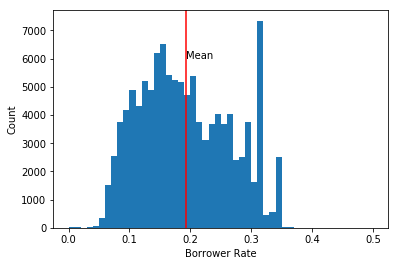

In [6]:
bins=np.arange(0,df.BorrowerRate.max()+0.01,0.01)
plt.hist(data=df,x='BorrowerRate',bins=bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
# for plotting the mean
a=df.BorrowerRate.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,6000,'Mean');

> The distribution of borrower rates is right skewed and has a have a high number of rates rates in the bin 0.32-0.33.

In [7]:
df.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [8]:
df.LoanOriginalAmount.median()

6500.0

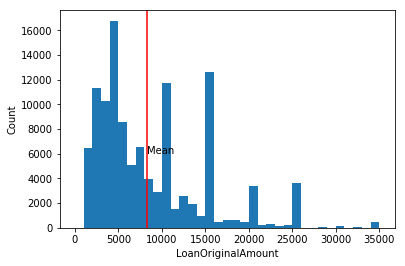

In [9]:
bins=np.arange(0,df.LoanOriginalAmount.max()+1000,1000)
plt.hist(data=df,x='LoanOriginalAmount',bins=bins)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Count')
# for plotting the mean
a=df.LoanOriginalAmount.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,6000,'Mean');

In [10]:
# credit grade is an ordinal qualitative variable so we will order it accordingly
credit_grade= ['AA','A','B','C','D','E','HR','NC']
credit_grade_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df['CreditGrade']=df['CreditGrade'].astype(credit_grade_ordered)
#setting the base colour for future plots
base_colour= sb.color_palette()[0]

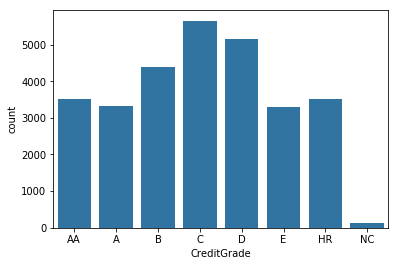

In [11]:
sb.countplot(data=df,x='CreditGrade',color=base_colour);

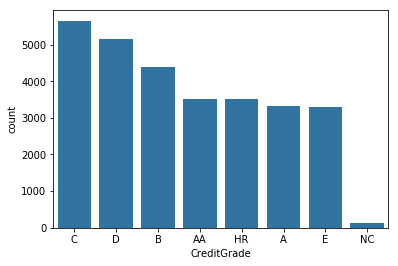

In [12]:
sb.countplot(data=df,x='CreditGrade',color=base_colour,
             order=df['CreditGrade'].value_counts().index);

> We can see that these loans are most popular with people with credit ratings C, D and B

In [13]:
# creating a dictionary for corresponing credit grade
df.replace(to_replace={"ProsperRating (numeric)": {0: "NC", 1: "HR", 2: "E",
                                                   3: "D", 4: "C",5: "B",
                                                   6: "A", 7: "AA",}}, inplace=True)
# renaming column so its easier to call
df.rename(index=str, columns={"ProsperRating (numeric)": "ProsperRating"}, inplace=True)
# prosper rating is an ordinal qualitative variable so we will order it accordingly
prosper_rating= ['AA','A','B','C','D','E','HR','NC']
prosper_rating_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=prosper_rating)
df['ProsperRating']=df['ProsperRating'].astype(prosper_rating_ordered)

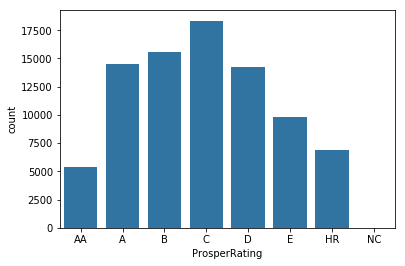

In [14]:
sb.countplot(data=df,x='ProsperRating',color=base_colour);

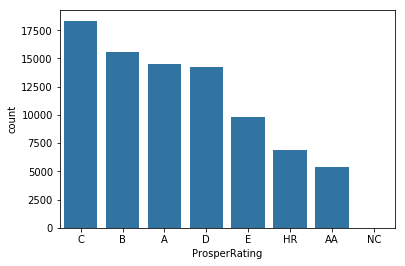

In [15]:
sb.countplot(data=df,x='ProsperRating',color=base_colour,
             order=df['ProsperRating'].value_counts().index);

> We can see that loans are most popular for people with prosper ratings of C, B, A, D.

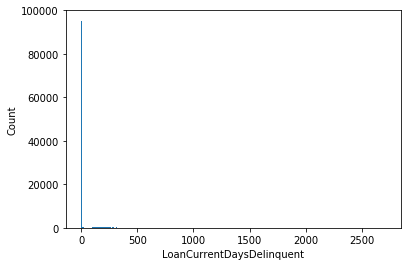

In [16]:
bins=np.arange(0,df.LoanCurrentDaysDelinquent.max()+10,10)
plt.hist(data=df,x='LoanCurrentDaysDelinquent',bins=bins)
plt.xlabel('LoanCurrentDaysDelinquent')
plt.ylabel('Count');

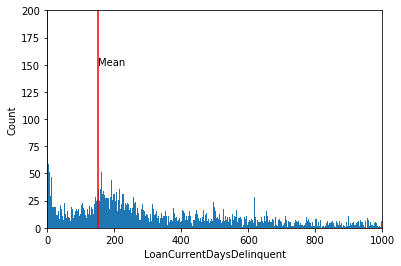

In [17]:
bins=np.arange(0,df.LoanCurrentDaysDelinquent.max()+1,1)
plt.hist(data=df,x='LoanCurrentDaysDelinquent',bins=bins)
plt.xlabel('LoanCurrentDaysDelinquent')
plt.ylabel('Count')
plt.xlim(0,1000)
plt.ylim(0,200)
# for plotting the mean
a=df.LoanCurrentDaysDelinquent.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,150,'Mean');

> The useful information from these plots is that we see alot of loans that aren't any days delinquent, alot with a couple days delinquent and a surge around 200 days.

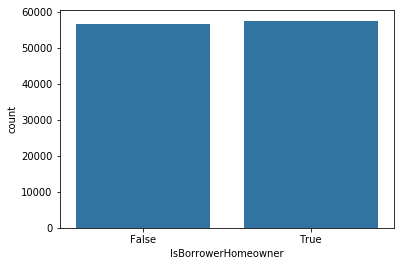

In [18]:
sb.countplot(data=df,x='IsBorrowerHomeowner',color=base_colour);

> This shows roughly equal propotions of the loans are people with homes and without

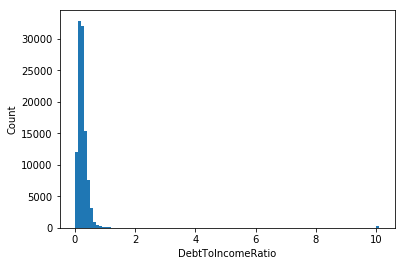

In [19]:
bins=np.arange(0,df.DebtToIncomeRatio.max()+0.1,0.1)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count');

In [20]:
df[df['DebtToIncomeRatio']>8].DebtToIncomeRatio.value_counts()

10.01    272
9.77       1
9.20       1
8.53       1
8.27       1
9.06       1
8.63       1
8.06       1
9.44       1
8.13       1
8.52       1
Name: DebtToIncomeRatio, dtype: int64

In [21]:
# removing the outliers for people with no income or very low incomes to debt
# https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
df[df['DebtToIncomeRatio']==10.01] = None

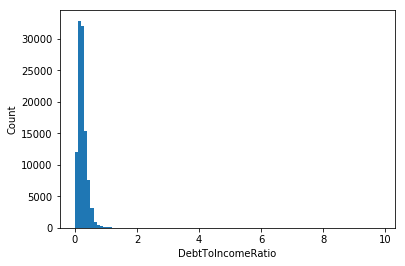

In [22]:
bins=np.arange(0,df.DebtToIncomeRatio.max()+0.1,0.1)
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count');

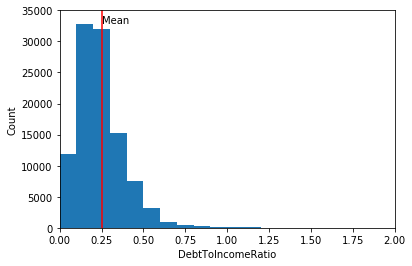

In [23]:
# choosing bin size
bins=np.arange(0,df.DebtToIncomeRatio.max()+0.1,0.1)
# plotting the histogram
plt.hist(data=df,x='DebtToIncomeRatio',bins=bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Count')
plt.xlim(0,2)
plt.ylim(0,35000)
# for plotting the mean
a=df.DebtToIncomeRatio.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,33000,'Mean');

> This plot shows almost all of the recorded loans with debt to income ratios are for people with less debt than income. We excluded the outliers at 10.01 for people with no income and debt.

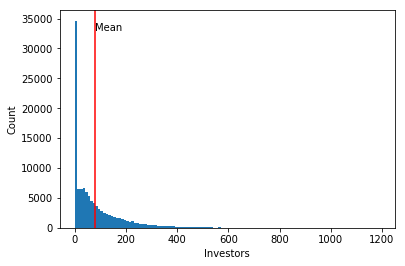

In [24]:
# choosing bin size
bins=np.arange(0,df.Investors.max()+10,10)
# plotting the histogram
plt.hist(data=df,x='Investors',bins=bins)
plt.xlabel('Investors')
plt.ylabel('Count')
# for plotting the mean
a=df.Investors.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,33000,'Mean');

>This plot shows that most loans have 1-10 investors, so we will zoom in on data that we are more interested in.

In [25]:
df.Investors.value_counts()

1.0       27804
2.0        1385
3.0         991
4.0         825
8.0         752
5.0         750
10.0        728
6.0         721
9.0         719
11.0        715
34.0        700
13.0        699
7.0         698
33.0        693
27.0        682
37.0        678
25.0        671
29.0        670
26.0        666
31.0        665
21.0        663
35.0        660
24.0        660
17.0        654
14.0        654
39.0        651
30.0        650
38.0        648
23.0        647
19.0        647
          ...  
669.0         1
881.0         1
844.0         1
703.0         1
675.0         1
647.0         1
691.0         1
913.0         1
706.0         1
760.0         1
734.0         1
762.0         1
620.0         1
888.0         1
821.0         1
707.0         1
735.0         1
1024.0        1
770.0         1
745.0         1
701.0         1
800.0         1
715.0         1
571.0         1
690.0         1
815.0         1
630.0         1
700.0         1
782.0         1
655.0         1
Name: Investors, Length:

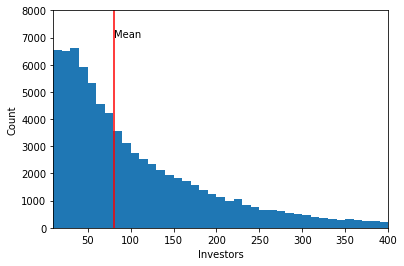

In [26]:
# choosing bin size
bins=np.arange(0,df.Investors.max()+10,10)
# plotting the histogram
plt.hist(data=df,x='Investors',bins=bins)
plt.xlabel('Investors')
plt.ylabel('Count')
plt.xlim(10,400)
plt.ylim(0,8000)
# for plotting the mean
a=df.Investors.mean()
#plotting the mean line
plt.axvline(a,color='red')
plt.text(a,7000,'Mean');

>This plot shows the number of investors from 10-400 in bin sizes of ten, from this we can see an exponential decrease in the number of investors for loans as we look along the increaing x-axis.

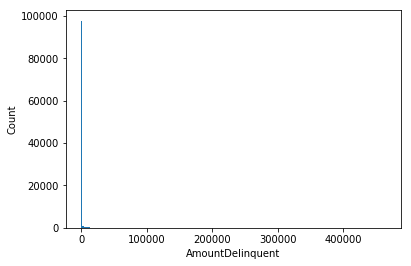

In [27]:
# choosing bin size
bins=np.arange(0,df.AmountDelinquent.max()+1000,1000)
# plotting the histogram
plt.hist(data=df,x='AmountDelinquent',bins=bins)
plt.xlabel('AmountDelinquent')
plt.ylabel('Count');

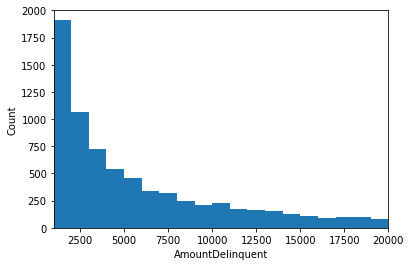

In [28]:
# choosing bin size
bins=np.arange(0,df.AmountDelinquent.max()+1000,1000)
# plotting the histogram
plt.hist(data=df,x='AmountDelinquent',bins=bins)
plt.xlabel('AmountDelinquent')
plt.ylabel('Count')
plt.xlim(1000,20000)
plt.ylim(0,2000);

> Almost all of the loans are delinquent in the bin size 0-1000 with nearly 100,000 of them, the rest are as shown in the second plot.

In [29]:
df.Term.describe()

count    113665.000000
mean         40.840329
std          10.444515
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

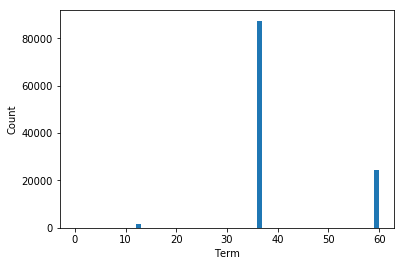

In [30]:
# choosing bin size
bins=np.arange(0,df.Term.max()+1,1)
# plotting the histogram
plt.hist(data=df,x='Term',bins=bins)
plt.xlabel('Term')
plt.ylabel('Count');

> There are three standard terms of 12,16,60 week loans

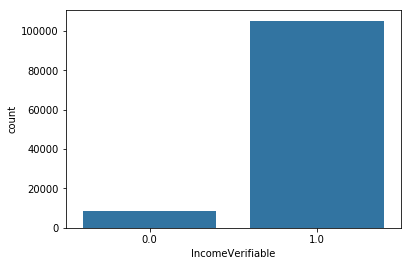

In [31]:
sb.countplot(data=df,x='IncomeVerifiable',color=base_colour);

> The large majority of loans have verifiable income, so this will no be a good indicator of borrower rate.

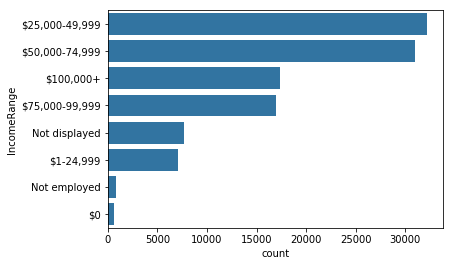

In [32]:
sb.countplot(data=df,y='IncomeRange',color=base_colour,order=df['IncomeRange'].value_counts().index);

> Its easy to see what income ranges are most popular for loans

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The borrower rate had an intersting spike at 0.32-0.33 that would be a good thing to explore. The original loan amount was a right skewed distribution and was easy to see the standard loan amounts of 5000, 10000, 15000, 20000, 25000, 30000, and 35000. I changed the limits on 'LoanOriginalAmount', 'LoanCurrentDaysDelinquent','DebtToIncomeRatio', 'Investors', and 'AmountDelinquent' to make it easier to se relevant data.

### Of the features I investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The 'LoanCurrentDaysDelinquent' and 'AmountDelinquent' had a large values around 0. I choose to keep these in the data frame instead of attributing a NaN value because it may be important to bivariant analysis. I have a feeling 'Investors' has such a high value count of 1 because you need at least one co-signer for the loan, so it is important to the dataset quality to keep these values instead of attributing a Nan value. As well, debt to income ratio has outliers at 10.01 to signify the maximum ratio where those poeple have no income or very little income. I removed this in the dataset because it may be important for bivariant exploration.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my
data.

### Qualitative VS Qualitative Variables

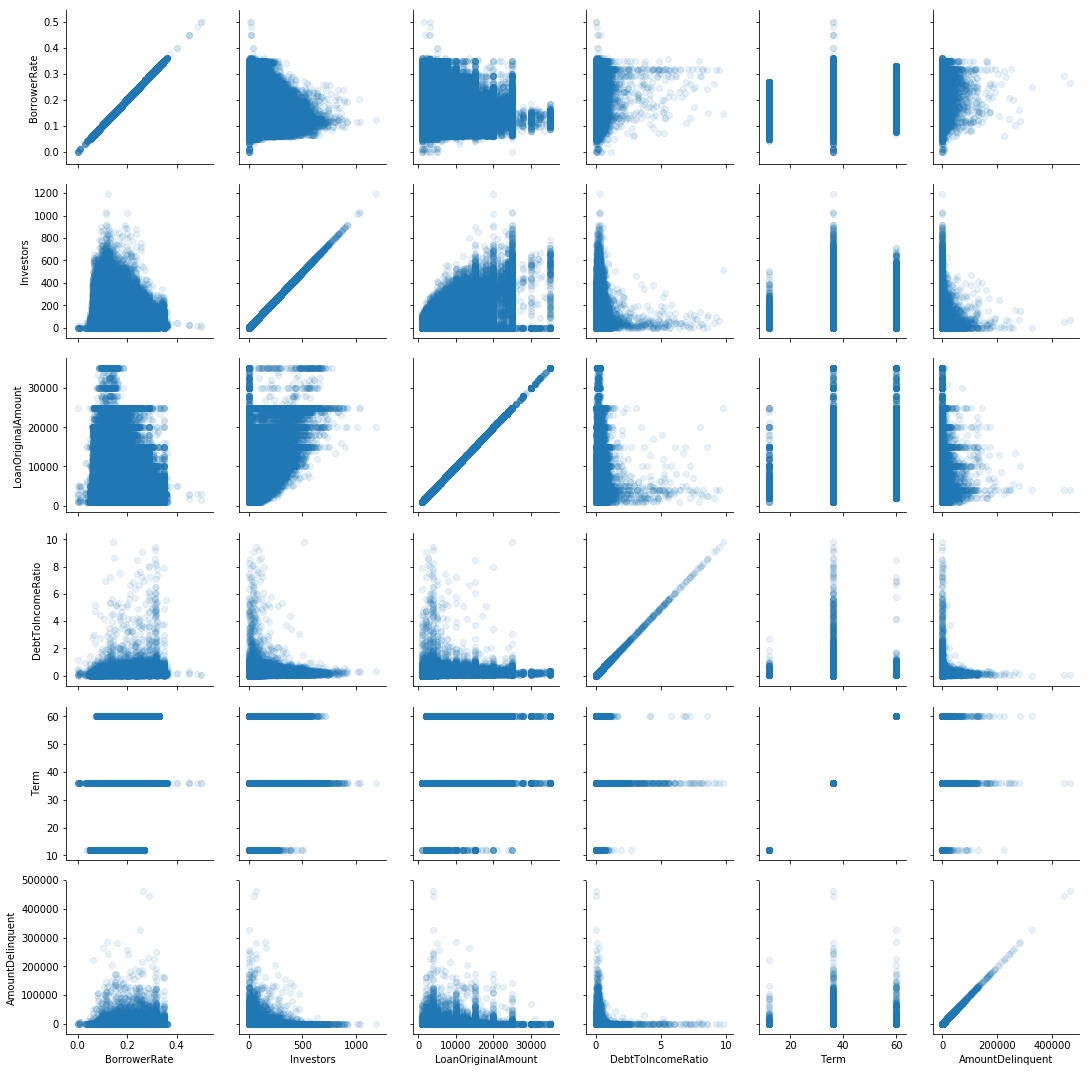

In [33]:
quant_vars=['BorrowerRate','Investors','LoanOriginalAmount','DebtToIncomeRatio','Term','AmountDelinquent']
g=sb.PairGrid(data=df,vars=quant_vars)
g.map(plt.scatter,alpha=0.1);

> A facet grib was the easiest way to compare all the quantitative variables to borrower rate. we can now look specifically at ones with interesting relationships.

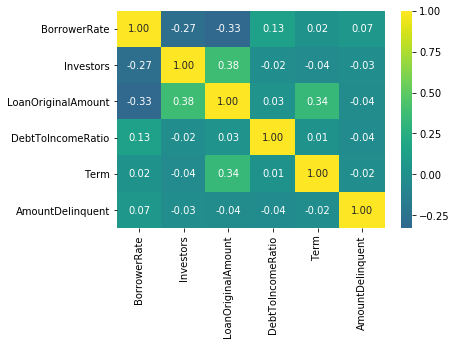

In [34]:
sb.heatmap(df[quant_vars].corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)

> We are interested in borrower rate so we can look across the top row or first column and see none of the variables have a strong correlation to borrower rate. However, debt to income ratio has the highest correlation and the amount of investors has the highest correlation to original loan amount out of a comparison of all the variables. Term and original loan amount also seem to be correlated.

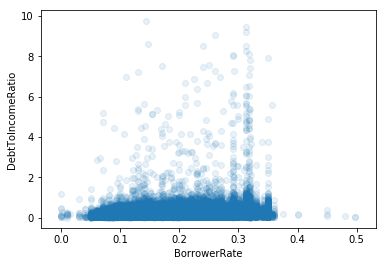

In [35]:
plt.scatter(data=df,x='BorrowerRate',y='DebtToIncomeRatio',alpha=0.1)
plt.xlabel('BorrowerRate')
plt.ylabel('DebtToIncomeRatio');

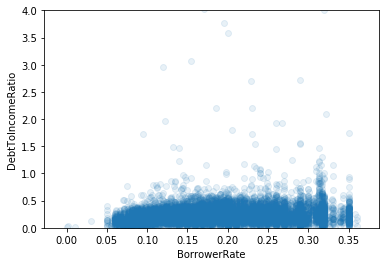

In [36]:
# sampled 10000 random data points to see through overlapping points better
plt.scatter(data=df.sample(10000),x='BorrowerRate',y='DebtToIncomeRatio',alpha=0.1)
plt.xlabel('BorrowerRate')
plt.ylabel('DebtToIncomeRatio')
# changing y limit to zoom in on points of interest
plt.ylim(0,4);

> Although the correlation coefficent was the highest for borrower rate and debt to income ratio there doesnt seem to be a strong visual trend. However, math works and we should trust the correlation because we can't tell how many points are overlapping.

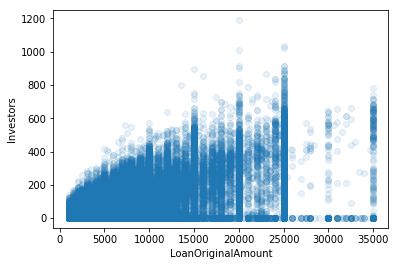

In [37]:
plt.scatter(data=df,x='LoanOriginalAmount',y='Investors',alpha=0.1)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('Investors');

> Here the correlation coefficent worked in identifying a visually evident trend. The higher the number of investors, the larger the loan. This may be how loans get approved for such large amounts.

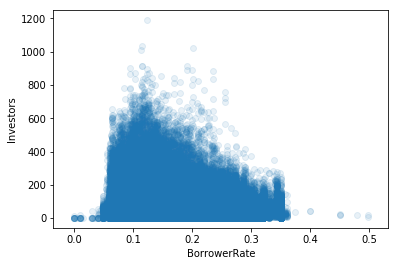

In [38]:
plt.scatter(data=df,x='BorrowerRate',y='Investors',alpha=0.1)
plt.xlabel('BorrowerRate')
plt.ylabel('Investors');

> Although the correlation coefficent was the lowest for borrower rate and investors there does seem to be a visually evident trend. The higher the number of investors the lower the borrower rate. The low correlation coefficent may have been caused by the large number of loans with 1 investor, it is necessary to keep these values. Although, because the correlation factor is low, borrower rate must depend on another variable(s). We will explore this visually in the multivariate section.

### QUANTITATIVE VS QUALITATIVE VARIABLES

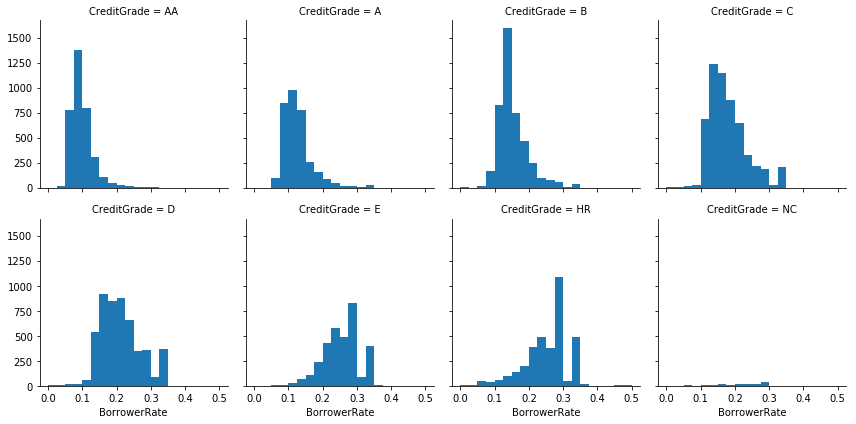

In [39]:
# credit grade is an ordinal qualitative variable so we will order it accordingly
credit_grade= ['AA','A','B','C','D','E','HR','NC']
credit_grade_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=credit_grade)
df['CreditGrade']=df['CreditGrade'].astype(credit_grade_ordered)
# choosing bin size
bins=np.arange(0,df.BorrowerRate.max()+0.025,0.025)
# plotting facet grid
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins);

We can see that credit score does correlate to a lower borrower rate. Credit grades AA, A, B, C and D are all right skewed towards lower borrower rates. Credit E, HR, and NC are left skewed to higher borrower rates.

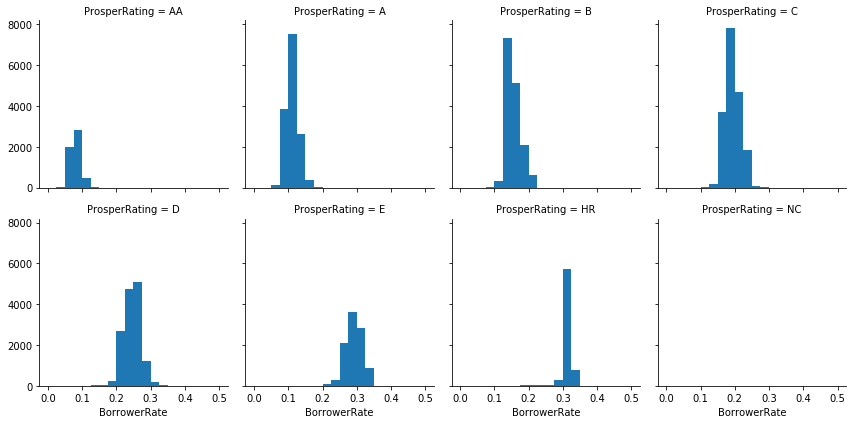

In [40]:
# choosing bin size
bins=np.arange(0,df.BorrowerRate.max()+0.025,0.025)
# plotting facet grid
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins);

> We can see that prosper rating does correlate to a lower borrower rate. Credit grades AA, A, B, C and D are all right skewed towards lower borrower rates. Credit E and HR are left skewed to higher borrower rates. By visual inspection we can see the prosper rating has a high effect on the borrower rate as compared to the credit grade. Both credit grade and propser rating are on the same scales so we can tell the standard devitation of the prosper rating is much smaller and its easier to see how each rating relates to a small variation in borrower rate.

In [41]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31049
$100,000+         17336
$75,000-99,999    16916
Not displayed      7682
$1-24,999          7087
Not employed        782
$0                  621
Name: IncomeRange, dtype: int64

In [42]:
income_range= ['Not Displayed','Not Employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
income_range_ordered= pd.api.types.CategoricalDtype(ordered=True, categories=income_range)
df['IncomeRange']=df['IncomeRange'].astype(income_range_ordered)

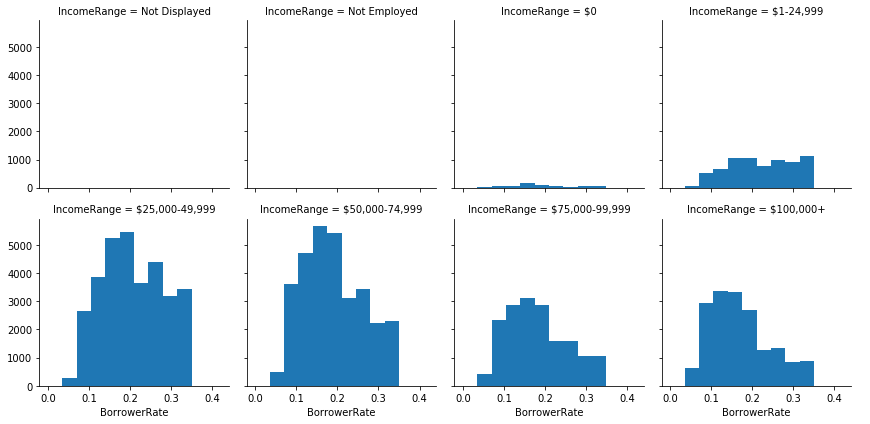

In [43]:
bins=np.arange(0,0.4+0.035,0.035)
g=sb.FacetGrid(data=df,col='IncomeRange',col_wrap=4)
g.map(plt.hist,'BorrowerRate',bins=bins)
g.add_legend();

> Surprising the borrower rates seem to be spread over the same range in every range of income. However, the mean of each distribution does show it has some effect on borrower rates.

In [44]:
# creating a dictionary for corresponing listing category
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno",
                                                     3: "Business", 4: "Personal",5: "Student",
                                                     6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                     10: "Cosmetic", 11: "Engagement", 12: "Green", 
                                                     13: "Household",14: "LargePurchase", 15: "Medical",
                                                     16: "Motorcycle", 17: "RV",18: "Taxes", 19: "Vacation",
                                                     20: "Wedding"}}, inplace=True)
# renaming column so its easier to call
df.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

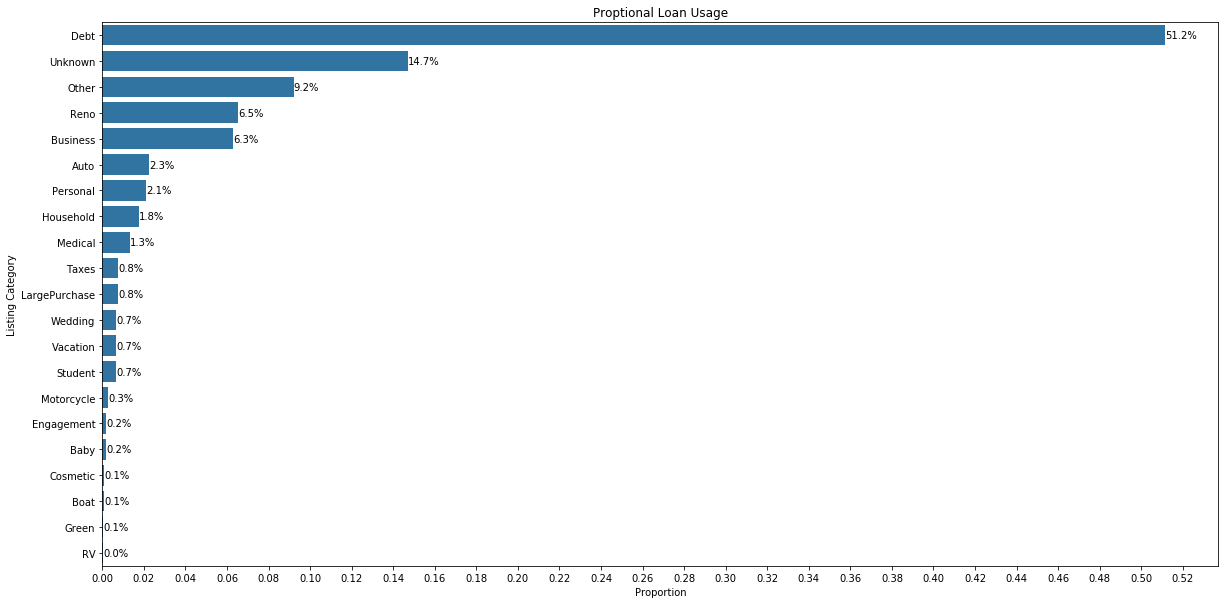

In [57]:
#setting the base colour for future plots
base_color= sb.color_palette()[0]
# making the plot proportional
type_counts = df['ListingCategory'].value_counts()
type_order = type_counts.index
n_Loans = df.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_Loans
# setting values for x axis ticks
tick_props = np.arange(0, max_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
# plotting figure
plt.figure(figsize=(20,10))
sb.countplot(data = df, y = 'ListingCategory', color = base_color, order = type_order)
# plotting percentages on bars
for i in range(type_counts.shape[0]):
    count=type_counts[i]
    pct_string='{:0.1f}%'.format(100*count/n_Loans)
    plt.text(count+1,i,pct_string,va='center')
# polishing plot by adding xticks labels and a title
plt.xticks(tick_props * n_Loans, tick_names)
plt.xlabel('Proportion')
plt.ylabel('Listing Category')
plt.title('Proptional Loan Usage');

> We can see that majority of the loans are being used for debt. This would explain why it was hard to find variabes that affect borrower rate. They may use factors to compute borrower rates for different loan usage.

### Relationships observed in this part of the investigation. How borrower rate varied with other features in the dataset.

> We compared borrower rate to alot of quantitative variables at first and saw little correlation. We saw a small visual trend in borrower rate and debt to income ratio, and the correlation coefficent was the highest for borrower rate and debt to income ratio. The higher the debt to income ratio the higher the borrower rate. We saw a stronger visual trend one in borrower rate and investors. The higher the number of investors the lower the borrower rate. The low correlation coefficent may have been caused by the large number of loans with 1 investor with varying borrower rates, but it is necessary to keep these values. Although, because the correlation factor is low, borrower rate must depend on another variable(s). We will explore this visually in the multivariant section. As well, credit grade and prosper rating both correlate to borrower rates. The better the credit rating the better the borrower rate. The borrower rates also seem to be affected by income range. The mean of each distribution does show it has some effect on borrower rates. This will be another area to explore this visually in the multivariant section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> For most circumstances the higher the number of investors, the larger the loan. This may be how loans get approved for such large amounts. We also saw that 51.2% of the loans are being used for debt.

## Multivariate Exploration

> I will compare credit grade and prosper rating respectively to the values of interest: borrower rate, income to debt ratio and investors. Then

> Let's first explore the relationship comparing credit grade/prosper rating to borrower rate, debt to income ratio and the categorical variable is the borrower a homeowner.

In [47]:
# setting 'IsBorrowerHomeowner' column to boolean for adding a legend
df.IsBorrowerHomeowner = df.IsBorrowerHomeowner.astype(bool)

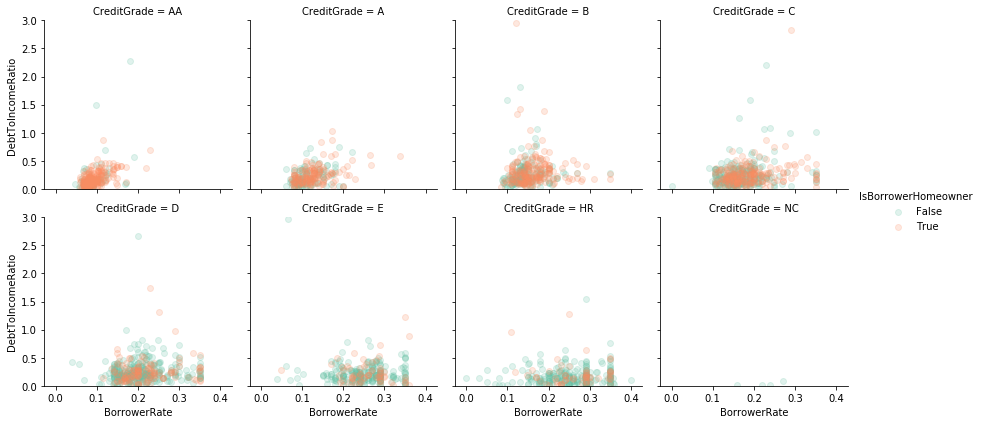

In [48]:
# sampled 10000 random data points to see through overlapping points better
g=sb.FacetGrid(data=df.sample(10000),col='CreditGrade',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','DebtToIncomeRatio',alpha=0.2)
# changing y limit to zoom in on points of interest
plt.ylim(0,3)
g.add_legend();

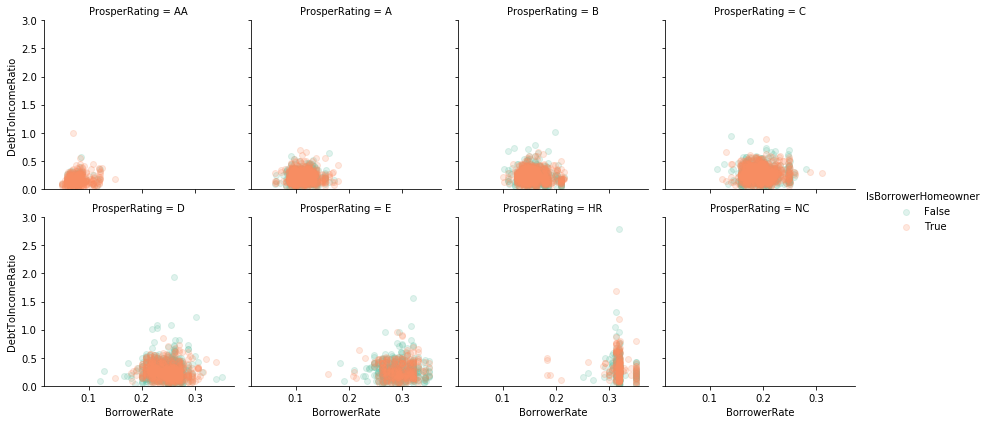

In [49]:
# sampled 10000 random data points to see through overlapping points better
g=sb.FacetGrid(data=df.sample(10000),col='ProsperRating',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','DebtToIncomeRatio',alpha=0.2)
# changing y limit to zoom in on points of interest
plt.ylim(0,3)
g.add_legend();

> Neither credit grade or prosper rating compared to debt to income ratio, borrower rate and is the borrower a homeowner show a strong linear relationship that they are correlated, so we should have trusted the calculated weak correlation coefficient earlier.

> Now let's explore the relationship comparing credit grade/prosper rating to borrower rate, number of investors and the categorical variable is the borrower a homeowner.

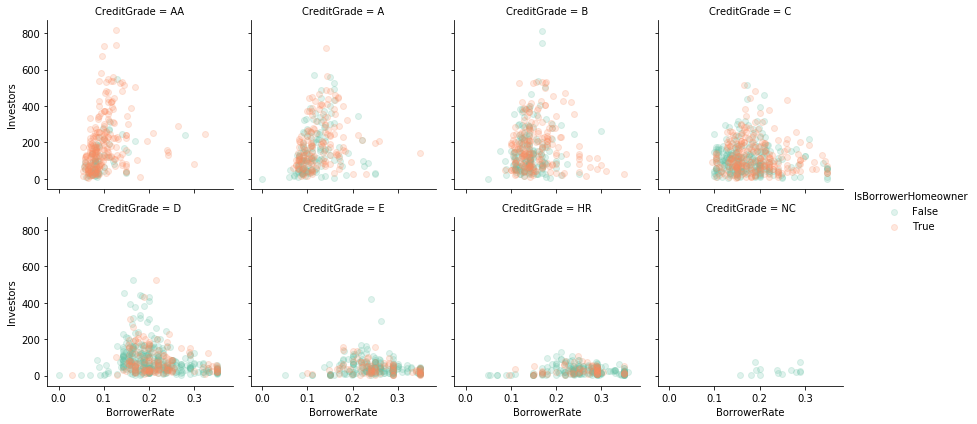

In [50]:
# sampled 10000 random data points to see through overlapping points better
g=sb.FacetGrid(data=df.sample(10000),col='CreditGrade',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.2)
g.add_legend();

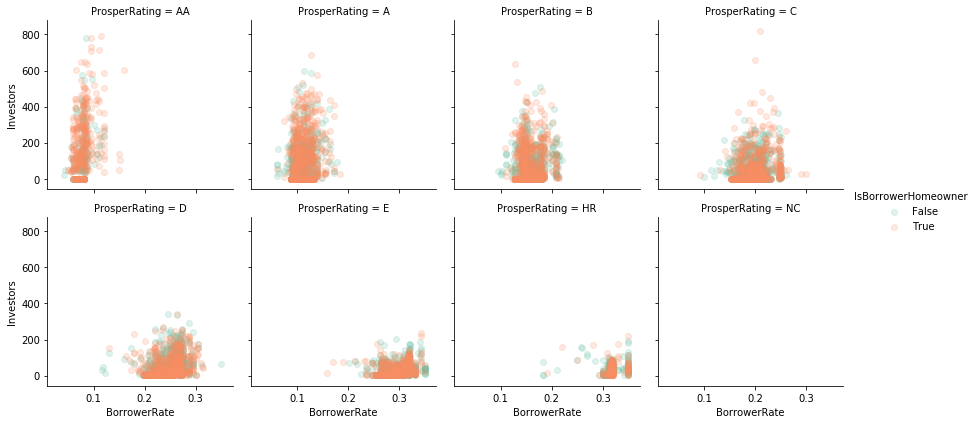

In [51]:
# sampled 10000 random data points to see through overlapping points better
g=sb.FacetGrid(data=df.sample(10000),col='ProsperRating',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.2)
g.add_legend();

> Neither credit grade or prosper rating compared to investors, borrower rate and is the borrower a homeowner show a linear relationship that they are correlated, so we should have trusted the calculated correlation coefficient earlier. It does seem in some instances that a high number of investors would help secure a lower borrower rate but the data does not support that for every case

>Now let's explore the relationship comparing income range to borrower rate, number of investors and the categorical variable is the borrower a homeowner.

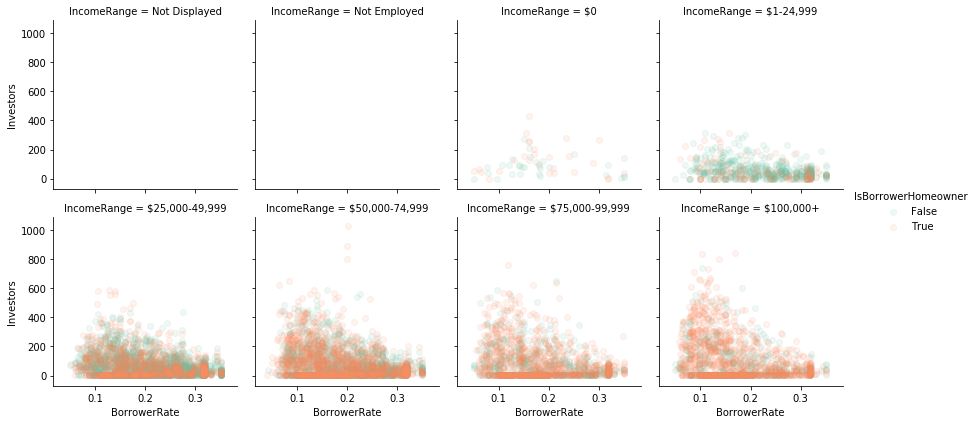

In [52]:
# sampled 10000 random data points to see through overlapping points better
g=sb.FacetGrid(data=df.sample(10000),col='IncomeRange',hue='IsBorrowerHomeowner',palette='Set2',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','Investors',alpha=0.1)
g.add_legend();

> Income range when compared to investors, borrower rate and is the borrower a homeowner doesn't show a linear relationship that they are correlated, so we should have trusted the calculated correlation coefficient earlier. For income ranges greater than $25,000 we see a higher number of investors does sometimes correlate to a lower borrower rate. However, we can still see that with values for borrower rate varies widely.

> Now let's explore the relationship comparing credit grade/prosper rating to borrower rate and days the loan is delinquent.

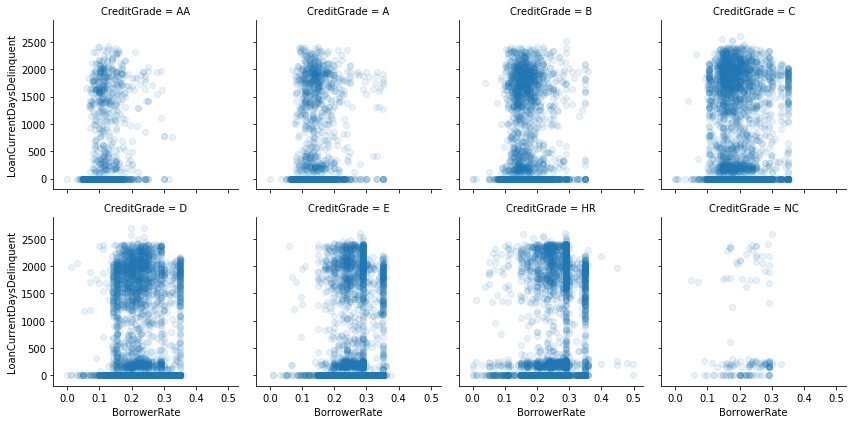

In [53]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanCurrentDaysDelinquent',alpha=0.1);

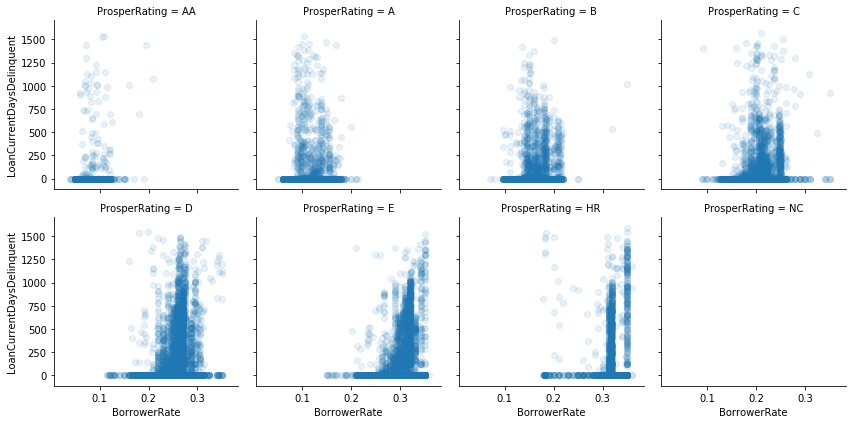

In [54]:
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanCurrentDaysDelinquent',alpha=0.1);

>I wouldn't expect a linear trend here because loans have a written contract stating the interest rate for the loan during deliquency, but we do see that from these facet plots. The agreed borrower rate does have alot of standard values depending on the amount of deliquent days or credit grade/prosper rating and the borrower rate shifts higher the lower the credit grade/prosper rating.

> Now let's explore the relationship comparing credit grade/prosper rating to borrower rate and the original loan amount.

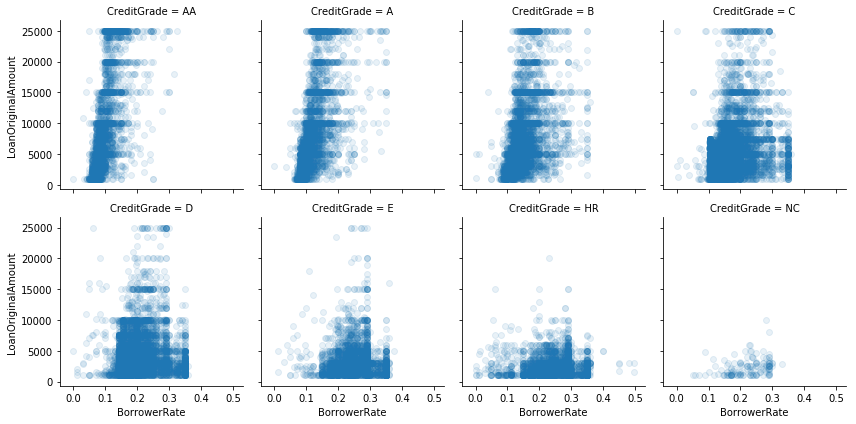

In [55]:
g=sb.FacetGrid(data=df,col='CreditGrade',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1);

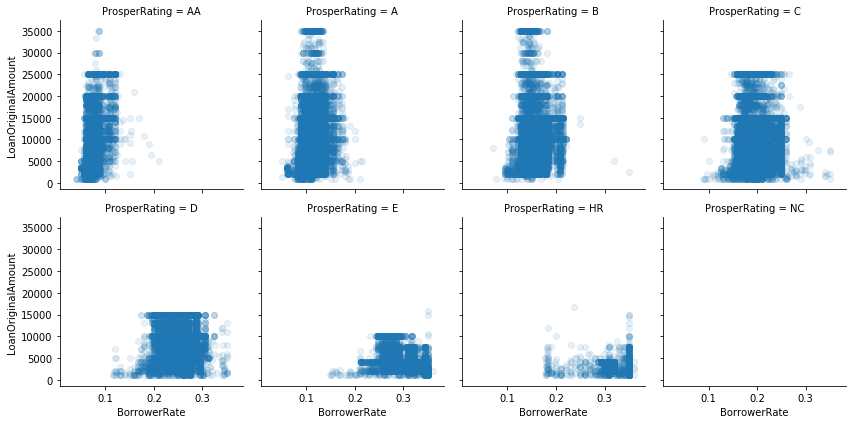

In [56]:
g=sb.FacetGrid(data=df,col='ProsperRating',col_wrap=4)
g.map(plt.scatter,'BorrowerRate','LoanOriginalAmount',alpha=0.1);

>I wouldn't expect a linear trend here because we would have uncovered a trend in bivariant analysis but we do see that from these facet plots is the amount each credit grade/prosper rating can secure a loan changes. The lower the credit grade/prosper rating the lower the maximum loan amount they can secure and the borrower rate shifts higher the lower the credit grade/prosper rating..

### Relationships I observed in this part of the investigation

> After this analysis it seems the variables used to try and determine how borrower rate was affected did not strengthen. The best indicator we could use to determine borrower rate was the prosper rating in the bivariant section. What would have made a better investigation is seeing what variables affect prosper rating.

### Interesting or surprising interactions between features

> I is intersting but not surprising that there were alot of standard borrower rates for delinquent accounts. Another interesting result in the visuals but not surprising on is that that credit grade/prosper rating changed the amount in which you could secure a loan.